In [1]:
import scipy.io

import scipy.io

try:
    brain = scipy.io.loadmat(r'C:\Users\UmurY\OneDrive\Masaüstü\Action_Clusters_Python\Raw_Files\Sub2_WB_Rel\allBetas_WholeBrain_r0.1_Sub2.mat')
    print("Loaded brain.mat successfully.")
    brain2 = scipy.io.loadmat(r'c:\Users\UmurY\OneDrive\Masaüstü\Action_Clusters_Python\Raw_Files\Sub2_WB_Rel\allBetas_WholeBrain_r0.2_Sub2.mat')
    print("Loaded brain2.mat successfully.")
    brain3 = scipy.io.loadmat(r'c:\Users\UmurY\OneDrive\Masaüstü\Action_Clusters_Python\Raw_Files\Sub2_WB_Rel\allBetas_WholeBrain_r0.3_Sub2.mat')
    print("Loaded brain3.mat successfully.")
    brain4 = scipy.io.loadmat(r'c:\Users\UmurY\OneDrive\Masaüstü\Action_Clusters_Python\Raw_Files\Sub2_WB_Rel\allBetas_WholeBrain_r0.4_Sub2.mat')
    print("Loaded brain4.mat successfully.")
    brain5 = scipy.io.loadmat(r'c:\Users\UmurY\OneDrive\Masaüstü\Action_Clusters_Python\Raw_Files\Sub2_WB_Rel\allBetas_WholeBrain_r0.5_Sub2.mat')
    print("Loaded brain5.mat successfully.")
except:
    print("Error loading brainmat")

try:
    brain=brain['allBetas']
    brain2=brain2['allBetas']
    brain3=brain3['allBetas']
    brain4=brain4['allBetas']
    brain5=brain5['allBetas']
    print("Accessed data in .mat files successfully.")
except Exception as e:
    print("Error accessing data in .mat files:", e)



Loaded brain.mat successfully.
Loaded brain2.mat successfully.
Loaded brain3.mat successfully.
Loaded brain4.mat successfully.
Loaded brain5.mat successfully.
Accessed data in .mat files successfully.


In [2]:
#All in dataframes
import pandas as pd
import numpy as np

brain = pd.DataFrame(brain)
brain2 = pd.DataFrame(brain2)
brain3 = pd.DataFrame(brain3)
brain4 = pd.DataFrame(brain4)
brain5 = pd.DataFrame(brain5)



In [3]:
# Define the starting indices
act_indices = list(range(0, 1072, 67))

# Create a list of lists where each sublist is a range of indices
action_beta_indices = [list(range(i, i + 58)) for i in act_indices]
#flatten
action_beta_indices = [item for sublist in action_beta_indices for item in sublist]

In [4]:
action_beta_indices
brain = brain.iloc[action_beta_indices,:]
brain2 = brain2.iloc[action_beta_indices,:]
brain3 = brain3.iloc[action_beta_indices,:]
brain4 = brain4.iloc[action_beta_indices,:]
brain5 = brain5.iloc[action_beta_indices,:]


#reset indexes
brain = brain.reset_index(drop=True)
brain2 = brain2.reset_index(drop=True)
brain3 = brain3.reset_index(drop=True)
brain4 = brain4.reset_index(drop=True)
brain5 = brain5.reset_index(drop=True)

In [5]:
#Match matlab indexixng for dfs and rows
brain.index = brain.index + 1
brain.columns = brain.columns + 1
brain2.index = brain2.index + 1
brain2.columns = brain2.columns + 1
brain3.index = brain3.index + 1
brain3.columns = brain3.columns + 1
brain4.index = brain4.index + 1
brain4.columns = brain4.columns + 1
brain5.index = brain5.index + 1
brain5.columns = brain5.columns + 1

In [6]:

nbrain = pd.DataFrame(np.zeros((58, brain.shape[1])))
nbrain.columns = brain.columns
nbrain.index = brain.index[0:58]
nbrain2 = pd.DataFrame(np.zeros((58, brain2.shape[1])))
nbrain2.columns = brain2.columns
nbrain2.index = brain2.index[0:58]
nbrain3 = pd.DataFrame(np.zeros((58, brain3.shape[1])))
nbrain3.columns = brain3.columns
nbrain3.index = brain3.index[0:58]
nbrain4 = pd.DataFrame(np.zeros((58, brain4.shape[1])))
nbrain4.columns = brain4.columns
nbrain4.index = brain4.index[0:58]
nbrain5 = pd.DataFrame(np.zeros((58, brain5.shape[1])))
nbrain5.columns = brain5.columns
nbrain5.index = brain5.index[0:58]


In [7]:
for m in range(16):
    for i in range (58):
            if not(i == 54 and m == 8):
                nbrain.iloc[i] += brain.iloc[m*58+i]
                nbrain2.iloc[i] += brain2.iloc[m*58+i]
                nbrain3.iloc[i] += brain3.iloc[m*58+i]
                nbrain4.iloc[i] += brain4.iloc[m*58+i]
                nbrain5.iloc[i] += brain5.iloc[m*58+i]

In [8]:
#nbrain = nbrain/16 for every row except 54

nbrain.iloc[0:54] = nbrain.iloc[0:54]/16
nbrain.iloc[54] = nbrain.iloc[54]/15
nbrain.iloc[55:58] = nbrain.iloc[55:58]/16
nbrain2.iloc[0:54] = nbrain2.iloc[0:54]/16
nbrain2.iloc[54] = nbrain2.iloc[54]/15
nbrain2.iloc[55:58] = nbrain2.iloc[55:58]/16
nbrain3.iloc[0:54] = nbrain3.iloc[0:54]/16
nbrain3.iloc[54] = nbrain3.iloc[54]/15
nbrain3.iloc[55:58] = nbrain3.iloc[55:58]/16
nbrain4.iloc[0:54] = nbrain4.iloc[0:54]/16
nbrain4.iloc[54] = nbrain4.iloc[54]/15
nbrain4.iloc[55:58] = nbrain4.iloc[55:58]/16
nbrain5.iloc[0:54] = nbrain5.iloc[0:54]/16
nbrain5.iloc[54] = nbrain5.iloc[54]/15
nbrain5.iloc[55:58] = nbrain5.iloc[55:58]/16




"""
nbrain = nbrain/16
nbrain2 = nbrain2/16
nbrain3 = nbrain3/16
nbrain4 = nbrain4/16
nbrain5 = nbrain5/16
"""

'\nnbrain = nbrain/16\nnbrain2 = nbrain2/16\nnbrain3 = nbrain3/16\nnbrain4 = nbrain4/16\nnbrain5 = nbrain5/16\n'

In [9]:
#Dissimilarity matrices for each region
from scipy.spatial.distance import pdist, squareform
brain_dissim = pdist(nbrain, metric='correlation')
brain_dissim = squareform(brain_dissim)
brain2_dissim = pdist(nbrain2, metric='correlation')
brain2_dissim = squareform(brain2_dissim)
brain3_dissim = pdist(nbrain3, metric='correlation')
brain3_dissim = squareform(brain3_dissim)
brain4_dissim = pdist(nbrain4, metric='correlation')
brain4_dissim = squareform(brain4_dissim)
brain5_dissim = pdist(nbrain5, metric='correlation')
brain5_dissim = squareform(brain5_dissim)


In [10]:
brain5_dissim

array([[0.        , 0.47359104, 0.42618697, ..., 0.49869665, 0.30099922,
        0.50182958],
       [0.47359104, 0.        , 0.4589022 , ..., 0.50785851, 0.66218316,
        0.55363393],
       [0.42618697, 0.4589022 , 0.        , ..., 0.58336148, 0.36593633,
        0.54943213],
       ...,
       [0.49869665, 0.50785851, 0.58336148, ..., 0.        , 0.62354412,
        0.38810275],
       [0.30099922, 0.66218316, 0.36593633, ..., 0.62354412, 0.        ,
        0.59411685],
       [0.50182958, 0.55363393, 0.54943213, ..., 0.38810275, 0.59411685,
        0.        ]])

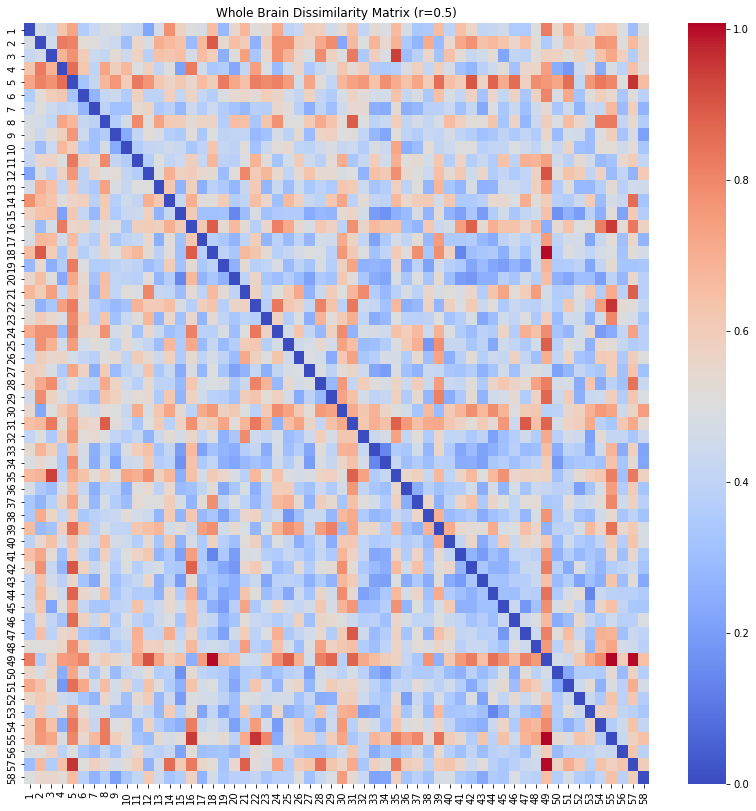

In [11]:
#Heatmaps for each region
import seaborn as sns
import matplotlib.pyplot as plt


#Bigger figures with bigger fonts and better resolution
plt.rcParams.update({'font.size': 22})
plt.rcParams["figure.figsize"] = (20, 20)
plt.rcParams['savefig.dpi'] = 300
plt.rcParams['figure.dpi'] = 300

plt.figure(figsize=(14, 14))
brain_dissim = pd.DataFrame(brain_dissim)
brain2_dissim = pd.DataFrame(brain2_dissim)
brain3_dissim = pd.DataFrame(brain3_dissim)
brain4_dissim = pd.DataFrame(brain4_dissim)
brain5_dissim = pd.DataFrame(brain5_dissim)

#Increase indexes of dissimilarity matrices by 1
brain_dissim.index = brain_dissim.index + 1
brain_dissim.columns = brain_dissim.columns + 1
brain2_dissim.index = brain2_dissim.index + 1
brain2_dissim.columns = brain2_dissim.columns + 1
brain3_dissim.index = brain3_dissim.index + 1
brain3_dissim.columns = brain3_dissim.columns + 1
brain4_dissim.index = brain4_dissim.index + 1
brain4_dissim.columns = brain4_dissim.columns + 1
brain5_dissim.index = brain5_dissim.index + 1
brain5_dissim.columns = brain5_dissim.columns + 1


sns.heatmap(brain5_dissim, cmap='coolwarm')
plt.title('Whole Brain Dissimilarity Matrix (r=0.5)')
plt.show()

In [12]:
brain_dissim

,1,2,3,4,5,6,7,8,9,10,...,49,50,51,52,53,54,55,56,57,58
1,0.000000,0.502980,0.411278,0.299172,0.335104,0.343756,0.503943,0.431800,0.497667,0.412263,...,0.484878,0.436786,0.341385,0.357471,0.413576,0.349667,0.511260,0.353903,0.371766,0.385481
2,0.502980,0.000000,0.374942,0.496050,0.509226,0.324358,0.470261,0.372276,0.502601,0.375092,...,0.436638,0.521362,0.429101,0.444346,0.617633,0.520420,0.526121,0.432609,0.446349,0.438790
3,0.411278,0.374942,0.000000,0.401918,0.448054,0.452947,0.449317,0.345724,0.547941,0.391337,...,0.397747,0.469029,0.331494,0.490091,0.391250,0.429089,0.477169,0.468426,0.349412,0.350662
4,0.299172,0.496050,0.401918,0.000000,0.417979,0.387760,0.411923,0.370090,0.435635,0.412976,...,0.407873,0.235941,0.169504,0.317420,0.377971,0.259401,0.388538,0.301017,0.431991,0.346520
5,0.335104,0.509226,0.448054,0.417979,0.000000,0.320151,0.475004,0.461598,0.515815,0.416722,...,0.442596,0.513919,0.420408,0.371670,0.496168,0.447518,0.439244,0.281290,0.517808,0.445158
6,0.343756,0.324358,0.452947,0.387760,0.320151,0.000000,0.368314,0.319433,0.401966,0.311181,...,0.485663,0.461011,0.402923,0.286701,0.510535,0.422974,0.470940,0.288959,0.470835,0.393772
7,0.503943,0.470261,0.449317,0.411923,0.475004,0.368314,0.000000,0.370475,0.439862,0.337184,...,0.545863,0.477058,0.466266,0.354742,0.488056,0.479729,0.602415,0.489393,0.487256,0.402195
8,0.431800,0.372276,0.345724,0.370090,0.461598,0.319433,0.370475,0.000000,0.384658,0.354817,...,0.379695,0.365071,0.309105,0.385116,0.420317,0.468972,0.557654,0.322562,0.504763,0.369361
9,0.497667,0.502601,0.547941,0.435635,0.515815,0.401966,0.439862,0.384658,0.000000,0.315032,...,0.492501,0.372462,0.407045,0.404064,0.383937,0.444636,0.477446,0.389110,0.585997,0.346685
10,0.412263,0.375092,0.391337,0.412976,0.416722,0.311181,0.337184,0.354817,0.315032,0.000000,...,0.473274,0.438175,0.396872,0.265009,0.427390,0.419304,0.459788,0.430515,0.465533,0.383218


In [13]:
mapping = {
    1: 2,
    2: 4,
    3: 5,
    4: 7,
    5: 8,
    6: 12,
    7: 13,
    8: 15,
    9: 16,
    10: 17,
    11: 20,
    12: 21,
    13: 22,
    14: 23,
    15: 24,
    16: 27,
    17: 28,
    18: 31,
    19: 35,
    20: 36,
    21:40,
    22:41,
    23:42,
    24:44,
    25:46,
    26:47,
    27:48,
    28:49,
    29:50,
    30:51,
    31:53,
    32:55,
    33:57,
    34:58,
    35:59,
    36:62,
    37:63,
    38:64,
    39:68,
    40:70,
    41:71,
    42:72,
    43:74,
    44:75,
    45:77,
    46:78,
    47:82, 
    48 :85, 
    49 :87, 
    50 :88, 
    51 :89, 
    52 :92, 
    53 :94, 
    54 :95, 
    55 :96, 
    56 :98, 
    57 :99, 
    58 :100
}


groups = [
    ('passive_inter', [4, 35, 58, 63, 89, 94]),
    ('active_inter', [36, 42, 47, 59, 75, 98]),
    ('comm_symbolic', [40, 51, 57]),
    ('comm_vocal', [2, 28, 85, 95]),
    ('manipulation', [7, 12, 13, 31, 50, 53, 96]),
    ('modify_substrate', [22, 44, 46, 64, 99]),
    ('digestion', [17, 21, 41, 72,88,92]),
    ('skin_displacement', [15, 16, 23, 70]),
    ('aim_in_space', [8, 20, 49, 71, 78, 87, 100]),
    ('locomotion_b', [55, 62, 68]),
    ('locomotion_q', [5,24,27,48,74, 77, 82])
]
def rename_and_reorder(dissim, mapping, groups):
    dissim.rename(index=mapping, columns=mapping, inplace=True)
    order = [index for group in groups for index in group[1]]
    dissim = dissim.reindex(order)
    dissim = dissim[order]
    return dissim

# Apply the function to each DSM
brain_dissim = rename_and_reorder(brain_dissim, mapping, groups)
brain2_dissim = rename_and_reorder(brain2_dissim, mapping, groups)
brain3_dissim = rename_and_reorder(brain3_dissim, mapping, groups)
brain4_dissim = rename_and_reorder(brain4_dissim, mapping, groups)
brain5_dissim = rename_and_reorder(brain5_dissim, mapping, groups)


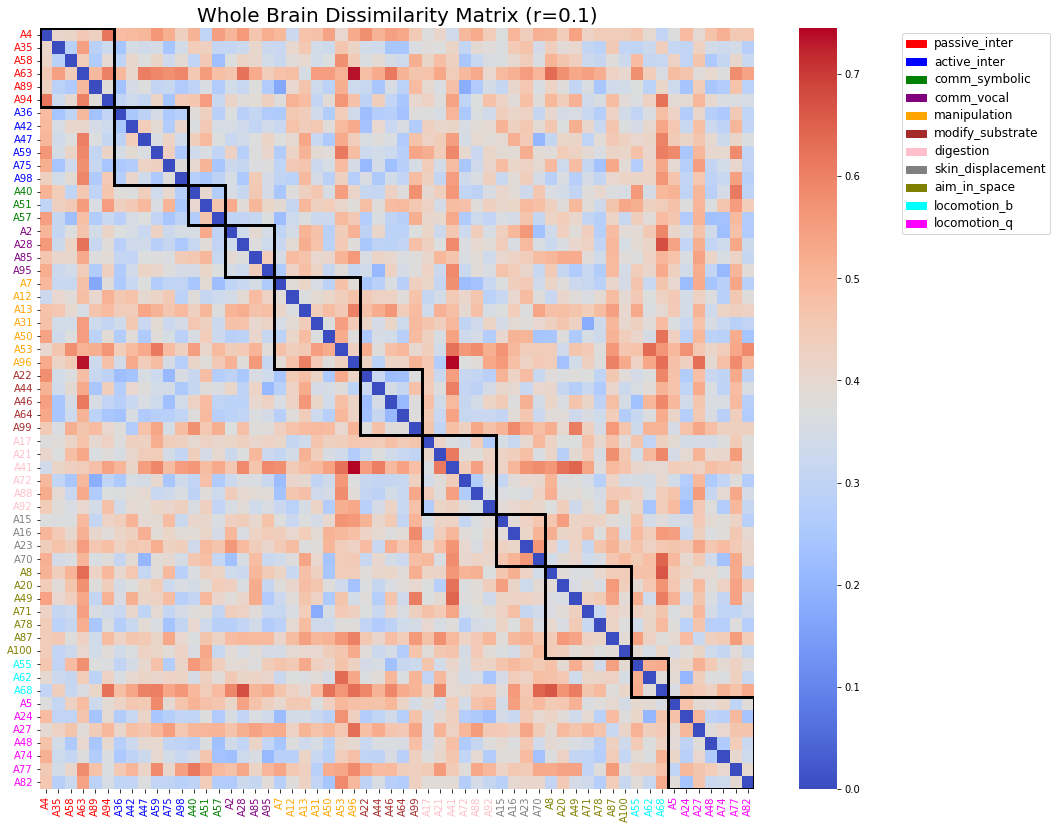

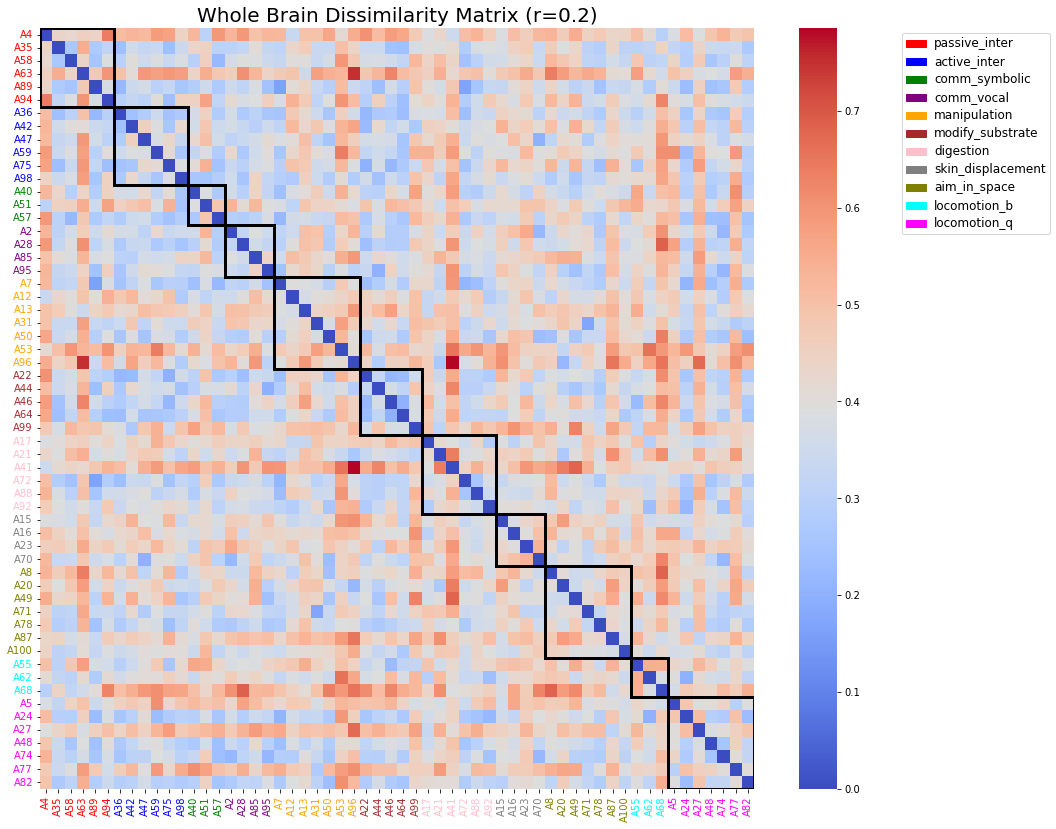

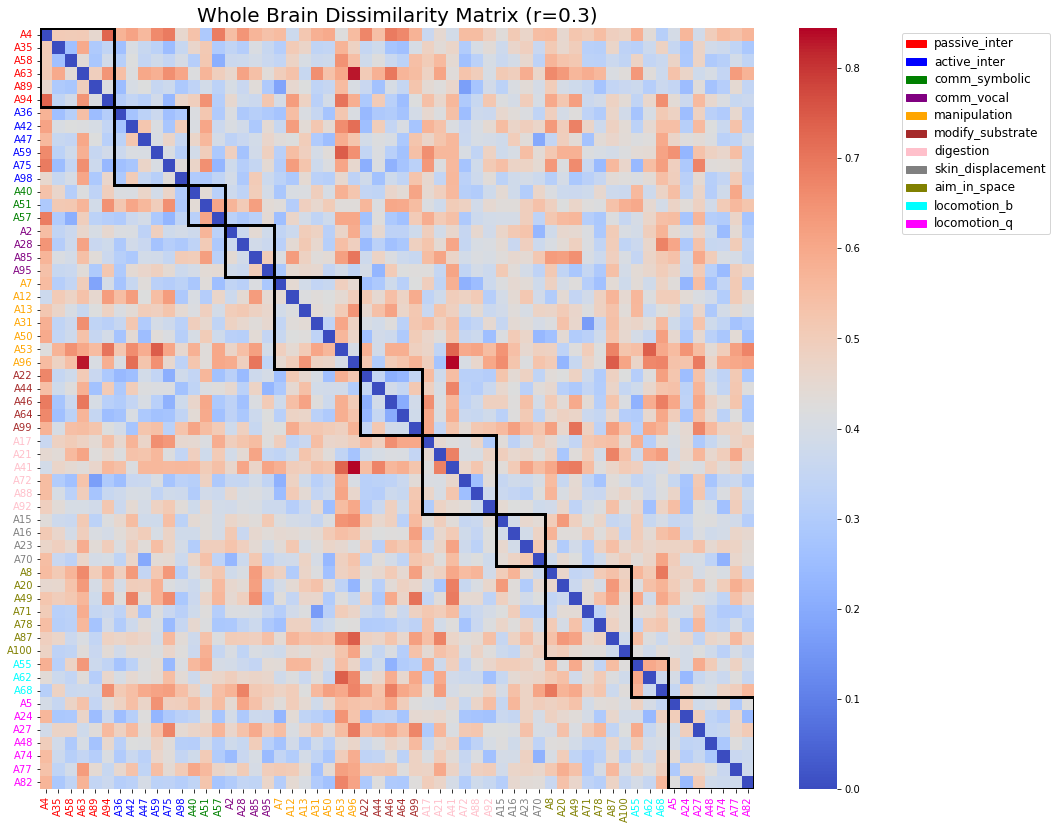

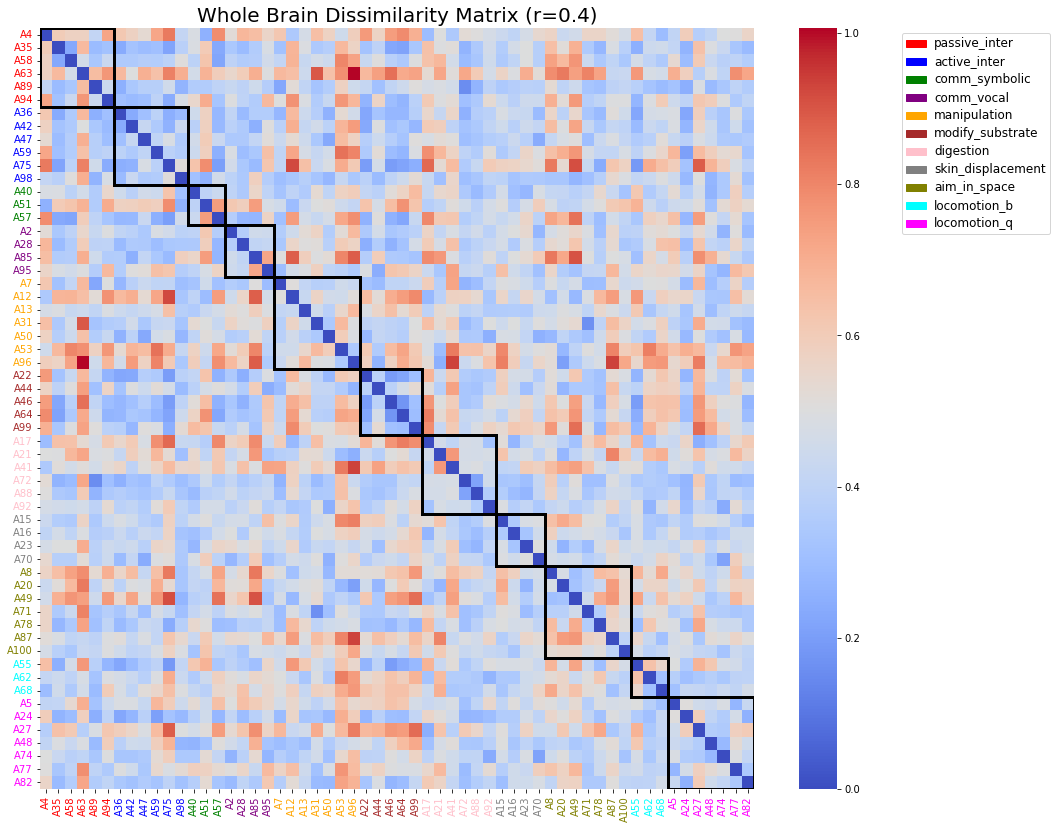

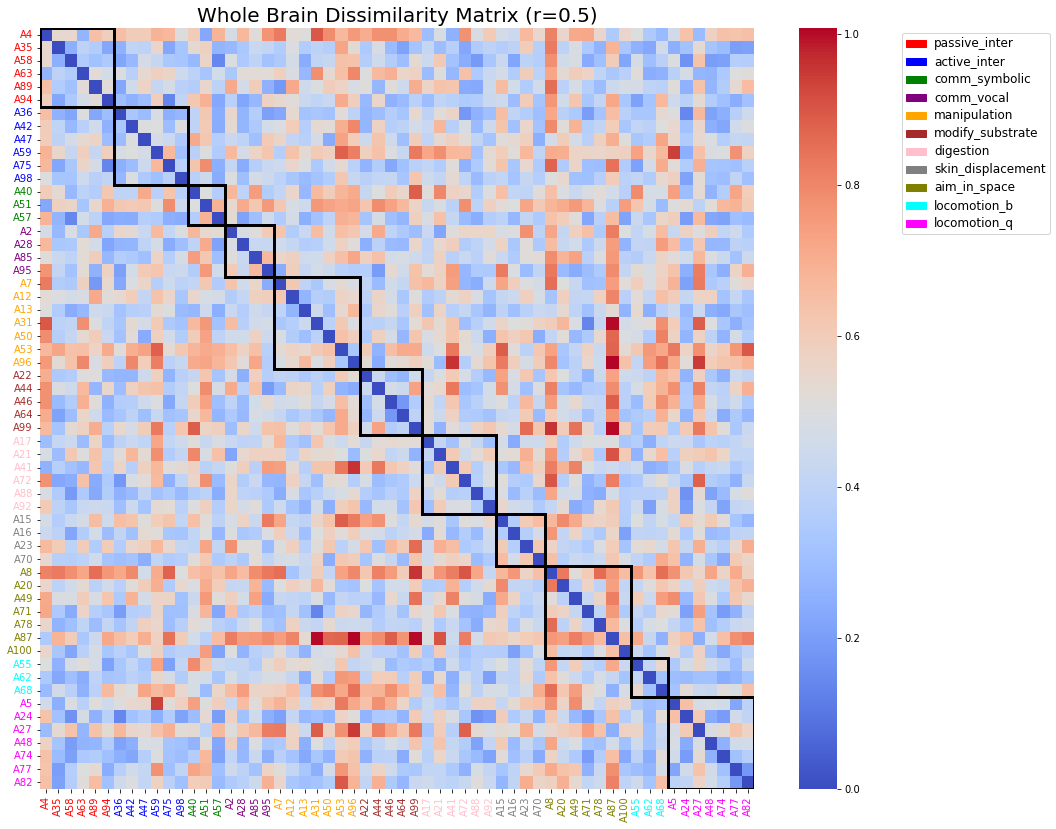

In [14]:
import matplotlib.patches as mpatches

def generate_heatmap(scaled_df, groups, title, save_path):
    scaled_df.index = scaled_df.index.map(str).map('A{}'.format)
    scaled_df.columns = scaled_df.columns.map(str).map('A{}'.format)  
    plt.figure(figsize=(16, 14))
    heatmap=sns.heatmap(scaled_df, cmap='coolwarm')
    plt.title(title, fontsize=20)  # Add title here
    yticks = heatmap.get_yticklabels()
    xticks=heatmap.get_xticklabels()
    colors = ['red', 'blue', 'green', 'purple', 'orange', 'brown', 'pink', 'gray', 'olive', 'cyan', 'magenta']
    start = 0
    for j,(group_name,indexes) in enumerate(groups):
        end = start + len(indexes)
        for i in range(start,end):
            yticks[i].set_color(colors[j])
            xticks[i].set_color(colors[j])
        # Add a rectangle for the group
        heatmap.add_patch(plt.Rectangle((start, start), end-start, end-start, fill=False, edgecolor='black', lw=3))
        start = end
    heatmap.set_yticklabels(yticks)
    patches = [mpatches.Patch(color=colors[i], label=name) for i,(name,indexes) in enumerate(groups)]
    legend = plt.legend(handles=patches,bbox_to_anchor=(1.20,1), loc=2)
    plt.setp(legend.get_texts(), fontsize='large') 
    plt.savefig(save_path)
    plt.show()

# Apply the function to each DSM with the correct title and save path
generate_heatmap(brain_dissim, groups, 'Whole Brain Dissimilarity Matrix (r=0.1)', r'c:\Users\UmurY\OneDrive\Masaüstü\Action_Clusters_Python\Result_Files\Clean DSM\Figures\Whole Brain Dissimilarity Matrix Sub2 (r=0.1).png')
generate_heatmap(brain2_dissim, groups, 'Whole Brain Dissimilarity Matrix (r=0.2)', r'c:\Users\UmurY\OneDrive\Masaüstü\Action_Clusters_Python\Result_Files\Clean DSM\Figures\Whole Brain Dissimilarity Matrix Sub2 (r=0.2).png')
generate_heatmap(brain3_dissim, groups, 'Whole Brain Dissimilarity Matrix (r=0.3)', r'c:\Users\UmurY\OneDrive\Masaüstü\Action_Clusters_Python\Result_Files\Clean DSM\Figures\Whole Brain Dissimilarity Matrix Sub2 (r=0.3).png')
generate_heatmap(brain4_dissim, groups, 'Whole Brain Dissimilarity Matrix (r=0.4)', r'c:\Users\UmurY\OneDrive\Masaüstü\Action_Clusters_Python\Result_Files\Clean DSM\Figures\Whole Brain Dissimilarity Matrix Sub2 (r=0.4).png')
generate_heatmap(brain5_dissim, groups, 'Whole Brain Dissimilarity Matrix (r=0.5)', r'c:\Users\UmurY\OneDrive\Masaüstü\Action_Clusters_Python\Result_Files\Clean DSM\Figures\Whole Brain Dissimilarity Matrix Sub2 (r=0.5).png')


In [15]:
#Save the dissimilarity matrices to the path C:\Users\UmurY\OneDrive\Masaüstü\Action_Clusters_Python\Result_Files\Clean DSM
brain_dissim.to_csv(r'C:\Users\UmurY\OneDrive\Masaüstü\Action_Clusters_Python\Result_Files\Clean DSM\Whole Brain Dissimilarity_Sub2 (r=0.1).csv')
brain2_dissim.to_csv(r'C:\Users\UmurY\OneDrive\Masaüstü\Action_Clusters_Python\Result_Files\Clean DSM\Whole Brain Dissimilarity_Sub2 (r=0.2).csv')
brain3_dissim.to_csv(r'C:\Users\UmurY\OneDrive\Masaüstü\Action_Clusters_Python\Result_Files\Clean DSM\Whole Brain Dissimilarity_Sub2 (r=0.3).csv')
brain4_dissim.to_csv(r'C:\Users\UmurY\OneDrive\Masaüstü\Action_Clusters_Python\Result_Files\Clean DSM\Whole Brain Dissimilarity_Sub2 (r=0.4).csv')
brain5_dissim.to_csv(r'C:\Users\UmurY\OneDrive\Masaüstü\Action_Clusters_Python\Result_Files\Clean DSM\Whole Brain Dissimilarity_Sub2 (r=0.5).csv')